## List top frequent 20 words of Fake news

In [44]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

In [45]:
fake_df = pd.read_csv(r"Fake.csv", sep=',')
fake_df.sample(10)

,title,text,subject,date
2569,"While Trump Tries Scaring Us Over ISIS, This ...",We all know Trump s paranoia over ISIS is maki...,News,"February 11, 2017"
17346,WHY WAS THIS YOUNG MAN SPONSORED BY CAIR INVIT...,It s Hard To Know Who Obama Hates More America...,Government News,"May 12, 2015"
36,Republican National Committee: Better A Pedop...,"By now, the whole world knows that Alabama Sen...",News,"December 5, 2017"
8556,Florida Governor Rick Scott Tax Cut His Way I...,Rick Scott has been governor of Florida for ju...,News,"January 24, 2016"
19831,WOW! HILLARY’S RAPIST HUSBAND Has To Hold Her ...,Hillary got her butt kicked last night. Trump ...,left-news,"Oct 10, 2016"
7834,Big Corp. Is So Afraid Of A Liberal SCOTUS Th...,It looks like Justice Antonin Scalia s untimel...,News,"February 26, 2016"
7608,Meet The ‘Responsible Gun Owner’ Who Was Shot...,Meet Florida resident Jamie Gilt. Everyone sa...,News,"March 9, 2016"
16490,HERE’S HOW HILLARY’S VP PICK Has Just Proven H...,Hillary s VP pick is proving himself to be a a...,Government News,"Jul 26, 2016"
23099,Facebook Partners With Snopes & Other So-Calle...,21st Century Wire says Facebook is partnering ...,Middle-east,"December 15, 2016"
8930,Trump-Supporting Gun Nut Holds AR-15 Like A B...,Gun nuts are a strange breed. They are paranoi...,News,"January 6, 2016"


In [46]:
vectorizer = CountVectorizer(stop_words='english', min_df=1000, token_pattern=r'[a-zA-Z]{2,}')
matrix = vectorizer.fit_transform(fake_df['title']+' '+fake_df['text'])
# Sum word counts across all documents
word_counts = matrix.sum(axis=0).tolist()[0]
# Create a list of tuples (word, frequency)
# Use get_feature_names_out() for newer versions of sklearn
features = vectorizer.get_feature_names_out()
word_freq = dict(zip(features, word_counts))
# Sort and get top 20
top_20_freq_items = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)[:20]
# Display as a Table
df_top20 = pd.DataFrame(top_20_freq_items, columns=['Word', 'Frequency'])
df_top20

,Word,Frequency
0,trump,89278
1,said,33957
2,president,28957
3,people,27108
4,just,21979
5,obama,21420
6,clinton,20351
7,donald,18638
8,like,18511
9,video,16833


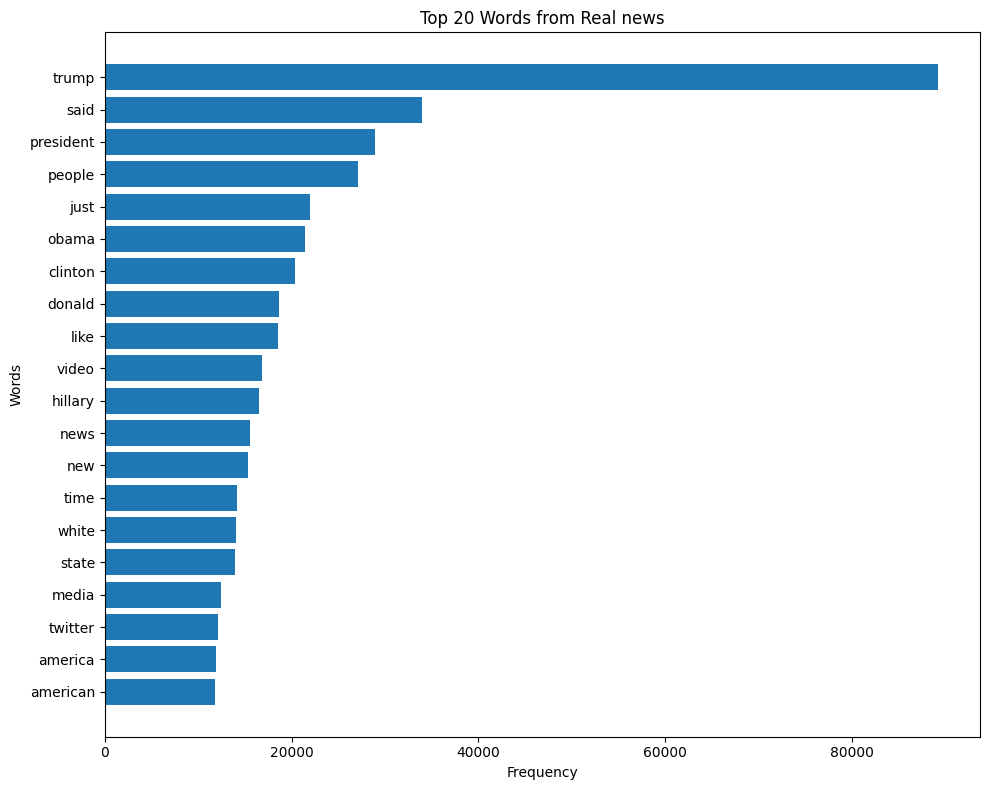

In [47]:
# Create a Bar Plot
plt.figure(figsize=(10, 8))
plt.barh(df_top20['Word'], df_top20['Frequency'])
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top 20 Words from Real news')
plt.gca().invert_yaxis() 
plt.tight_layout()
plt.show()

###  Using Apriori approach to list top words

In [48]:
vectorizer = CountVectorizer(stop_words='english', binary=True, min_df=1000, token_pattern=r'[a-zA-Z]{2,}')
matrix = vectorizer.fit_transform(fake_df['title']+' '+fake_df['text'])
# Convert back to a DataFrame
sparse_df = pd.DataFrame.sparse.from_spmatrix(
    matrix, 
    columns=vectorizer.get_feature_names_out()
)
sparse_df.sample(5)

,able,absolutely,access,according,account,accused,act,action,actions,actually,...,worst,wouldn,wrong,wrote,year,years,yes,york,young,youtube
20429,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
12661,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3039,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
21453,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
10291,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### List top frequent 20 words of Fake news using Apriori

In [49]:
from mlxtend.frequent_patterns import apriori

freq_items = apriori(sparse_df, min_support=0.2, use_colnames=True, max_len=1)
freq_items_sorted = freq_items.sort_values(by='support', ascending=False)
top_20_freq_items = freq_items_sorted.head(20)
top_20_freq_items

,support,itemsets
38,0.556067,(trump)
30,0.546229,(said)
17,0.508368,(just)
25,0.490695,(people)
26,0.455091,(president)
40,0.441293,(video)
19,0.437758,(like)
11,0.392700,(donald)
16,0.384311,(image)
36,0.371833,(time)


C:\Users\ibrahima\AppData\Local\Temp\ipykernel_28640\1059507910.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_20_freq_items['itemsets_str'] = top_20_freq_items['itemsets'].apply(lambda x: ', '.join(list(x)))


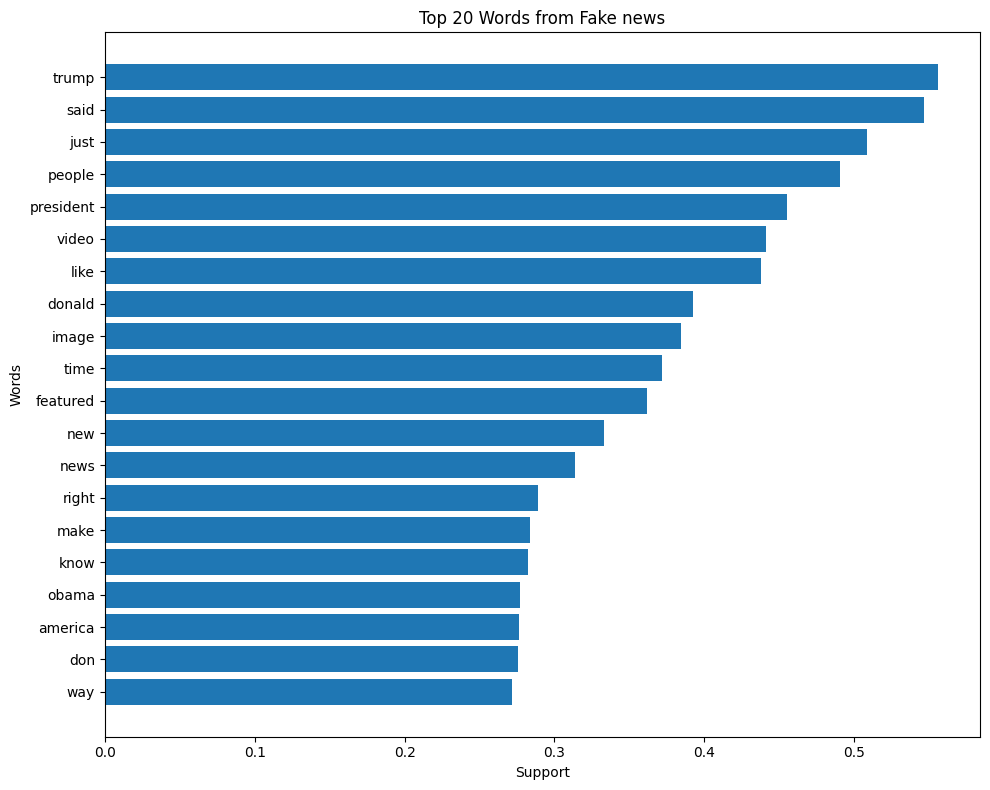

In [43]:
# Create a Bar Plot
plt.figure(figsize=(10, 8))
top_20_freq_items['itemsets_str'] = top_20_freq_items['itemsets'].apply(lambda x: ', '.join(list(x)))
plt.barh(top_20_freq_items['itemsets_str'], top_20_freq_items['support'])
plt.xlabel('Support')
plt.ylabel('Words')
plt.title('Top 20 Words from Fake news')
plt.gca().invert_yaxis() 
plt.tight_layout()
plt.show()